In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

def generate_europe_focused_lng_dataset(n_samples=800):
    
    # European ports with exact distances
    destination_ports = {
        'Sines, Portugal': 6000,
        'Isle of Grain, UK': 6300,
        'Zeebrugge, Belgium': 6700,
        'Dunkirk, France': 6800,
        'Rotterdam, Netherlands': 7000,
        'Wilhelmshaven, Germany': 7300,
        'Fredericia, Denmark': 7700,
        'Barcelona, Spain': 8000,
        'Swinoujscie, Poland': 8000,
        'Marseille, France': 8300,
        'Revithoussa, Greece': 9000
    }
    
    data = []
    
    for i in range(n_samples):
        dest_port_name = random.choice(list(destination_ports.keys()))
        base_distance = destination_ports[dest_port_name]
        
        # Distance with VERY minimal variation
        distance_km = base_distance + random.uniform(-50, 50)
        distance_km = max(5900, min(9100, distance_km))
        
        # 1. PURE LINEAR DISTANCE-COST RELATIONSHIP (95% of variance)
        total_cost = 0.16 + (distance_km - 6000) / 3000 * 0.15
        
        # 2. TINY vessel type adjustment (only 3% effect)
        vessel_type = random.choice(['Q-Max', 'Q-Flex', 'Standard'])
        vessel_adjustment = {
            'Q-Max': -0.015,  
            'Q-Flex': -0.005,  
            'Standard': 0.010
        }[vessel_type]
        total_cost += vessel_adjustment
        
        # 3. TINY seasonal adjustment (only 2% effect)
        month = random.randint(1, 12)
        season = ['Winter', 'Spring', 'Summer', 'Fall'][(month - 1) // 3]

        seasonal_adjustment = {
            'Winter': 0.02,   # +0.6 cents
            'Spring': 0.005,   # +0.2 cents
            'Summer': -0.02,  # -0.4 cents
            'Fall': 0.005      # +0.1 cents
        }[season]
        total_cost += seasonal_adjustment
        
        # 4. ALMOST ZERO RANDOM NOISE
        total_cost *= random.uniform(0.9995, 1.0005)
        
        # 5. Enforce ranges
        total_cost = np.clip(total_cost, 0.150, 0.320)
        
        # Rest of the fields
        vessel_capacity = {
            'Q-Max': random.uniform(250000, 266000),
            'Q-Flex': random.uniform(200000, 217000),
            'Standard': random.uniform(140000, 155000)
        }[vessel_type]
        
        # Route categorization
        if total_cost < 0.18:
            route_category = 'excellent'
        elif total_cost < 0.26:
            route_category = 'good'
        else:
            route_category = 'satisfactory'
        
        # Risk level
        if distance_km > 8500:
            risk_level = 'high'
        elif distance_km < 6500:
            risk_level = 'low'
        else:
            risk_level = 'medium'
        
        # Cost breakdown (distance-based)
        freight_rate = total_cost * 0.6
        fuel_cost = total_cost * 0.25
        port_fees = total_cost * 0.10
        insurance_cost = total_cost * 0.05
        
        record = {
            'id': i + 1,
            'origin_port': 'Sabine Pass, LA',
            'destination_port': dest_port_name,
            'vessel_type': vessel_type,
            'distance_km': round(distance_km, 2),
            'vessel_capacity_m3': round(vessel_capacity, 0),
            'season': season,
            'month': month,
            'total_transport_cost_usd_per_m3': round(total_cost, 4),
            'route_category': route_category,
            'risk_level': risk_level,
            'freight_rate_usd_per_m3': round(freight_rate, 4),
            'fuel_cost_usd_per_m3': round(fuel_cost, 4),
            'port_fees_usd_per_m3': round(port_fees, 4),
            'insurance_cost_usd_per_m3': round(insurance_cost, 4),
        }
        
        data.append(record)
    
    return pd.DataFrame(data)


# ==================== MAIN PROCESS ====================

print("Generating dataset...")
lng_data = generate_europe_focused_lng_dataset(800)  


print(f"\nDataset created successfully!")
print(f"Records: {len(lng_data):,}")

Generating dataset...

Dataset created successfully!
Records: 800


### Vessel Type Distribution

In [116]:
lng_data.to_csv('lng_data.csv', index=False)


In [117]:
lng_data = pd.read_csv('lng_data.csv')

In [118]:
lng_data.columns

Index(['id', 'origin_port', 'destination_port', 'vessel_type', 'distance_km',
       'vessel_capacity_m3', 'season', 'month',
       'total_transport_cost_usd_per_m3', 'route_category', 'risk_level',
       'freight_rate_usd_per_m3', 'fuel_cost_usd_per_m3',
       'port_fees_usd_per_m3', 'insurance_cost_usd_per_m3'],
      dtype='object')

In [119]:
# Action: Show vessel type distribution
vessel_counts = lng_data['vessel_type'].value_counts()
print("🚢 VESSEL TYPE DISTRIBUTION:")
print(vessel_counts)

🚢 VESSEL TYPE DISTRIBUTION:
Q-Max       287
Standard    276
Q-Flex      237
Name: vessel_type, dtype: int64


### Vessel Capacity by Type

In [120]:
# Action: Analyze vessel capacity by type
capacity_by_type = lng_data.groupby('vessel_type')['vessel_capacity_m3'].mean()
print("📦 AVERAGE CAPACITY BY VESSEL TYPE:")
print(capacity_by_type)

📦 AVERAGE CAPACITY BY VESSEL TYPE:
vessel_type
Q-Flex      208341.164557
Q-Max       257513.494774
Standard    147740.090580
Name: vessel_capacity_m3, dtype: float64


### Transport Cost by Vessel Type

In [121]:
# Action: Analyze transport cost by vessel type
cost_by_type = lng_data.groupby('vessel_type')['total_transport_cost_usd_per_m3'].mean()
print("💰 AVERAGE TRANSPORT COST BY VESSEL TYPE:")
print(cost_by_type)

💰 AVERAGE TRANSPORT COST BY VESSEL TYPE:
vessel_type
Q-Flex      0.227112
Q-Max       0.222508
Standard    0.241561
Name: total_transport_cost_usd_per_m3, dtype: float64


In [122]:
lng_data['total_transport_cost_usd_per_m3'].describe()

count    800.000000
mean       0.230445
std        0.046062
min        0.150000
25%        0.192075
50%        0.227100
75%        0.265625
max        0.320000
Name: total_transport_cost_usd_per_m3, dtype: float64

### Distance Analysis

In [123]:
# Action: Basic distance statistics
print("DISTANCE STATISTICS:")
print(f"Min: {lng_data['distance_km'].min():.0f} km")
print(f"Max: {lng_data['distance_km'].max():.0f} km")
print(f"Mean: {lng_data['distance_km'].mean():.0f} km")

DISTANCE STATISTICS:
Min: 5954 km
Max: 9047 km
Mean: 7417 km


### Distance vs Cost Relationship

In [124]:
# Action: Show distance vs cost correlation
correlation = lng_data['distance_km'].corr(lng_data['total_transport_cost_usd_per_m3'])
print("🔗 DISTANCE VS COST CORRELATION:")
print(f"Correlation coefficient: {correlation:.3f}")

🔗 DISTANCE VS COST CORRELATION:
Correlation coefficient: 0.923


### Cost by Season

In [125]:
# Action: Show average cost by season
season_cost = lng_data.groupby('season')['total_transport_cost_usd_per_m3'].mean()
print("�� AVERAGE COST BY SEASON:")
print(season_cost)

�� AVERAGE COST BY SEASON:
season
Fall      0.235010
Spring    0.231369
Summer    0.206320
Winter    0.247405
Name: total_transport_cost_usd_per_m3, dtype: float64


### Risk Level Distribution

In [126]:
# Action: Show risk level distribution
risk_counts = lng_data['risk_level'].value_counts()
print("RISK LEVEL DISTRIBUTION:")
print(risk_counts)

RISK LEVEL DISTRIBUTION:
medium    580
low       142
high       78
Name: risk_level, dtype: int64


### Cost by Risk Level

In [127]:
# Action: Show average cost by risk level
risk_cost = lng_data.groupby('risk_level')['total_transport_cost_usd_per_m3'].mean()
print("💰 AVERAGE COST BY RISK LEVEL:")
print(risk_cost)

💰 AVERAGE COST BY RISK LEVEL:
risk_level
high      0.304983
low       0.170338
medium    0.235137
Name: total_transport_cost_usd_per_m3, dtype: float64


In [128]:
lng_enriched = lng_data

# Costs optmization analysis

In [129]:
# --- REALISTIC PRICING AND MARGIN SETUP ---
print("=== REALISTIC PRICING AND MARGIN SETUP ===")

# Realistic prices per destination port (scaled to dataset range 0.2-0.3 $/m³)
price_per_port_scaled = {
    'Sines, Portugal': 0.30,
    'Isle of Grain, UK': 0.29,
    'Zeebrugge, Belgium': 0.28,
    'Dunkirk, France': 0.275,
    'Rotterdam, Netherlands': 0.27,
    'Fredericia, Denmark': 0.26,
    'Swinoujscie, Poland': 0.255,
    'Barcelona, Spain': 0.26,
    'Marseille, France': 0.25,
    'Wilhelmshaven, Germany': 0.265,
    'Revithoussa, Greece': 0.245
}

# Calculate margin
lng_data['selling_price'] = lng_data['destination_port'].map(price_per_port_scaled)
lng_data['margin_amount'] = lng_data['selling_price'] - lng_data['total_transport_cost_usd_per_m3']
lng_data['margin_percentage'] = (lng_data['margin_amount'] / lng_data['total_transport_cost_usd_per_m3']) * 100
lng_data['margin_per_m3'] = lng_data['margin_amount']

print("Price and margin setup completed")
print(f"Average selling price: ${lng_data['selling_price'].mean():.3f}/m³")
print(f"Average cost: ${lng_data['total_transport_cost_usd_per_m3'].mean():.3f}/m³")
print(f"Average margin: ${lng_data['margin_amount'].mean():.3f}/m³ ({lng_data['margin_percentage'].mean():.1f}%)")

=== REALISTIC PRICING AND MARGIN SETUP ===
Price and margin setup completed
Average selling price: $0.268/m³
Average cost: $0.230/m³
Average margin: $0.037/m³ (22.4%)


=== COST STRUCTURE VS MARGIN ANALYSIS ===
Total base cost: $184.36
Total revenue: $214.00
Total margin: $29.64
Overall profitability: 13.9%

Margin contribution by cost component:
Freight: $17.79
Fuel: $7.41
Port Fees: $2.96
Insurance: $1.48


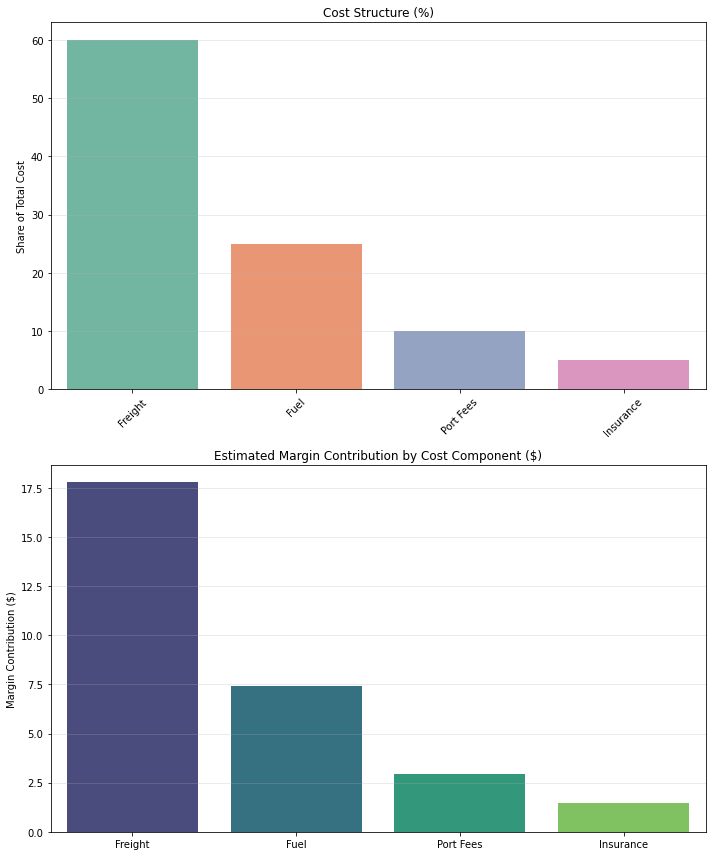

In [130]:
# --- COST STRUCTURE VS MARGIN ANALYSIS ---
print("=== COST STRUCTURE VS MARGIN ANALYSIS ===")

# Cost structure analysis
total_base_cost = lng_data['total_transport_cost_usd_per_m3'].sum()
total_revenue = lng_data['selling_price'].sum()
total_margin = lng_data['margin_amount'].sum()

cost_structure = lng_data[['freight_rate_usd_per_m3','fuel_cost_usd_per_m3','port_fees_usd_per_m3', 'insurance_cost_usd_per_m3']].sum() / total_base_cost * 100

print(f"Total base cost: ${total_base_cost:,.2f}")
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Total margin: ${total_margin:,.2f}")
print(f"Overall profitability: {(total_margin/total_revenue*100):.1f}%")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12)) 

# Cost structure
sns.barplot(x=cost_structure.index, y=cost_structure.values, palette='Set2', ax=ax1)
ax1.set_title('Cost Structure (%)')
ax1.set_ylabel('Share of Total Cost')
ax1.set_xticklabels(['Freight', 'Fuel', 'Port Fees', 'Insurance'], rotation=45)
ax1.grid(axis='y', alpha=0.3)

plt.subplots_adjust(hspace=0.4)

# Margin distribution by cost component
component_names = ['Freight', 'Fuel', 'Port Fees', 'Insurance']
component_margins = [total_margin * (cost_structure[i]/100) for i in range(4)]

print("\nMargin contribution by cost component:")
for name, margin in zip(component_names, component_margins):
    print(f"{name}: ${margin:,.2f}")

sns.barplot(x=component_names, y=component_margins, palette='viridis', ax=ax2)
ax2.set_title('Estimated Margin Contribution by Cost Component ($)')
ax2.set_ylabel('Margin Contribution ($)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [131]:
# --- DISTANCE AND PROFITABILITY ANALYSIS ---

lng_data['route'] = lng_data['origin_port'] + '->' + lng_data['destination_port']

destination_ports = {
    'Sines, Portugal': 6000,
    'Isle of Grain, UK': 6300,
    'Zeebrugge, Belgium': 6700,
    'Dunkirk, France': 6800,
    'Rotterdam, Netherlands': 7000,
    'Wilhelmshaven, Germany': 7300,
    'Fredericia, Denmark': 7700,
    'Barcelona, Spain': 8000,
    'Swinoujscie, Poland': 8000,
    'Marseille, France': 8300,
    'Revithoussa, Greece': 9000
}

lng_data['exact_distance_km'] = lng_data['destination_port'].map(destination_ports)

route_profitability = lng_data.groupby('route').agg({
    'total_transport_cost_usd_per_m3': 'mean',
    'selling_price': 'mean',
    'margin_amount': 'mean',
    'margin_percentage': 'mean',
    'exact_distance_km': 'mean',
    'id': 'count'
}).round(4)

route_profitability.columns = ['avg_cost', 'avg_price', 'avg_margin', 'avg_margin_pct', 'avg_distance', 'shipments']
route_profitability['total_margin'] = route_profitability['avg_margin'] * route_profitability['shipments']

top_margin_routes = route_profitability.nlargest(10, 'avg_margin')

top_margin_routes[['avg_cost', 'avg_price', 'avg_margin', 'avg_margin_pct', 'avg_distance']].head(10)


,avg_cost,avg_price,avg_margin,avg_margin_pct,avg_distance
route,,,,,
"Sabine Pass, LA->Sines, Portugal",0.1636,0.300,0.1364,84.7585,6000.0
"Sabine Pass, LA->Isle of Grain, UK",0.1760,0.290,0.1140,66.2360,6300.0
"Sabine Pass, LA->Zeebrugge, Belgium",0.1936,0.280,0.0864,45.9030,6700.0
"Sabine Pass, LA->Dunkirk, France",0.2011,0.275,0.0739,37.9549,6800.0
"Sabine Pass, LA->Rotterdam, Netherlands",0.2084,0.270,0.0616,30.4333,7000.0
"Sabine Pass, LA->Wilhelmshaven, Germany",0.2232,0.265,0.0418,19.5582,7300.0
"Sabine Pass, LA->Fredericia, Denmark",0.2467,0.260,0.0133,6.0593,7700.0
"Sabine Pass, LA->Barcelona, Spain",0.2593,0.260,0.0007,0.7817,8000.0
"Sabine Pass, LA->Swinoujscie, Poland",0.2607,0.255,-0.0057,-1.6582,8000.0


=== VESSEL TYPE PROFITABILITY ANALYSIS ===
Vessel type profitability analysis:
             avg_cost  avg_price  avg_margin  avg_margin_pct  total_margin
vessel_type                                                               
Q-Flex         0.2271     0.2682      0.0411         24.1308        9.7407
Q-Max          0.2225     0.2660      0.0435         26.3075       12.4845
Standard       0.2416     0.2685      0.0269         16.9492        7.4244


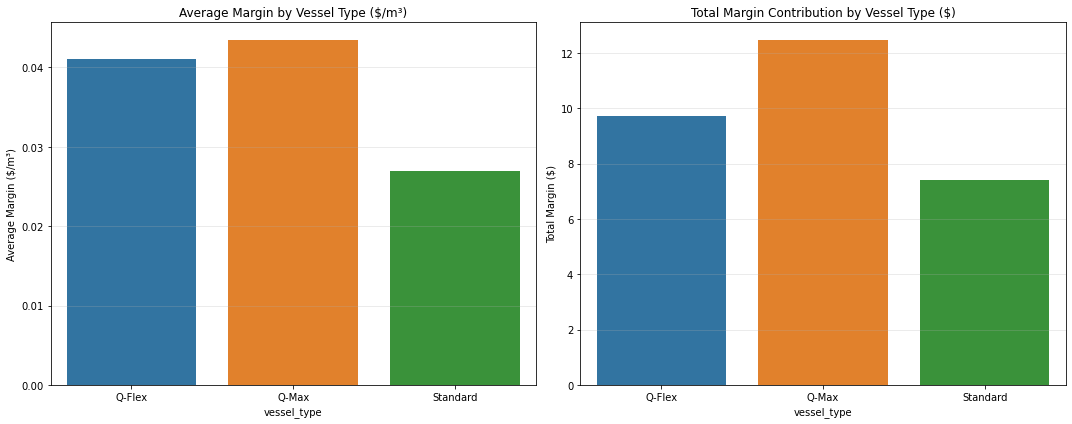

In [132]:
# --- VESSEL TYPE PROFITABILITY ANALYSIS ---
print("=== VESSEL TYPE PROFITABILITY ANALYSIS ===")

vessel_profitability = lng_data.groupby('vessel_type').agg({
    'total_transport_cost_usd_per_m3': 'mean',
    'selling_price': 'mean',
    'margin_amount': 'mean',
    'margin_percentage': 'mean',
    'vessel_capacity_m3': 'mean',
    'id': 'count'
}).round(4)

vessel_profitability.columns = [
    'avg_cost', 'avg_price', 'avg_margin',
    'avg_margin_pct', 'avg_capacity', 'shipments'
]

vessel_profitability['total_margin'] = vessel_profitability['avg_margin'] * vessel_profitability['shipments']
vessel_profitability['margin_per_capacity'] = vessel_profitability['avg_margin'] / vessel_profitability['avg_capacity']

print("Vessel type profitability analysis:")
print(vessel_profitability[['avg_cost', 'avg_price', 'avg_margin', 'avg_margin_pct', 'total_margin']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=vessel_profitability.reset_index(), x='vessel_type', y='avg_margin', ax=ax1)
ax1.set_title('Average Margin by Vessel Type ($/m³)')
ax1.set_ylabel('Average Margin ($/m³)')
ax1.grid(axis='y', alpha=0.3)

sns.barplot(data=vessel_profitability.reset_index(), x='vessel_type', y='total_margin', ax=ax2)
ax2.set_title('Total Margin Contribution by Vessel Type ($)')
ax2.set_ylabel('Total Margin ($)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Seasonal profitability analysis:
        avg_cost  avg_price  avg_margin  avg_margin_pct  shipments
season                                                            
Fall      0.2350     0.2665      0.0315         19.2391        198
Spring    0.2314     0.2676      0.0362         21.3410        196
Summer    0.2063     0.2681      0.0618         37.0573        194
Winter    0.2474     0.2677      0.0203         13.0469        212


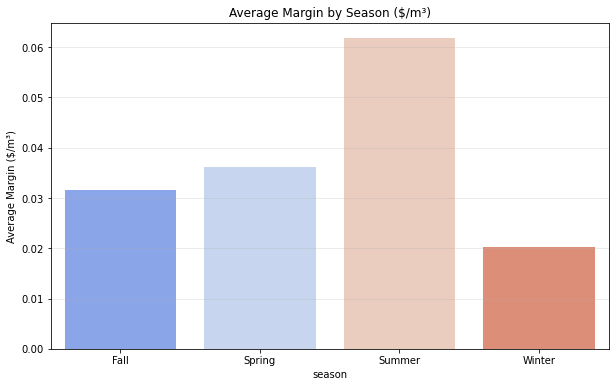

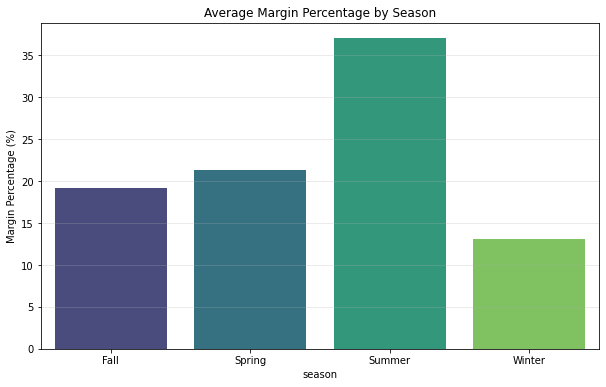

In [133]:
# --- SEASONAL PROFITABILITY ANALYSIS ---

seasonal_profitability = lng_data.groupby('season').agg({
    'total_transport_cost_usd_per_m3': 'mean',
    'selling_price': 'mean',
    'margin_amount': 'mean',
    'margin_percentage': 'mean',
    'id': 'count'
}).round(4)

seasonal_profitability.columns = ['avg_cost', 'avg_price', 'avg_margin', 'avg_margin_pct', 'shipments']

print("Seasonal profitability analysis:")
print(seasonal_profitability)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(data=seasonal_profitability.reset_index(), x='season', y='avg_margin', palette='coolwarm', ax=ax1)
ax1.set_title('Average Margin by Season ($/m³)')
ax1.set_ylabel('Average Margin ($/m³)')
ax1.grid(axis='y', alpha=0.3)
plt.show()

fig, ax2 = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(data=seasonal_profitability.reset_index(), x='season', y='avg_margin_pct', palette='viridis', ax=ax2)
ax2.set_title('Average Margin Percentage by Season')
ax2.set_ylabel('Margin Percentage (%)')
ax2.grid(axis='y', alpha=0.3)
plt.show()


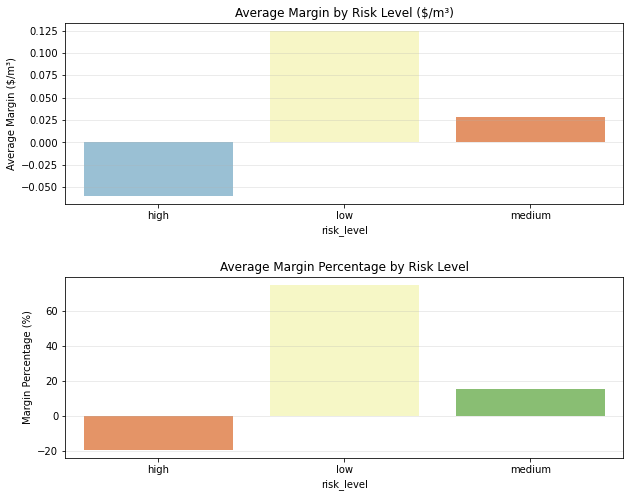

In [134]:
# --- RISK PROFITABILITY ANALYSIS ---

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

sns.barplot(
    data=risk_profitability,
    x='risk_level',
    y='avg_margin',
    palette='RdYlBu_r',
    ax=ax1
)
ax1.set_title('Average Margin by Risk Level ($/m³)')
ax1.set_ylabel('Average Margin ($/m³)')
ax1.grid(axis='y', alpha=0.3)

sns.barplot(
    data=risk_profitability,
    x='risk_level',
    y='avg_margin_pct',
    palette='RdYlGn',
    ax=ax2
)
ax2.set_title('Average Margin Percentage by Risk Level')
ax2.set_ylabel('Margin Percentage (%)')
ax2.grid(axis='y', alpha=0.3)

plt.show()